# Tree-Based Methods

## Applied

#### 7. Create a plot displaying the test error resulting from random forests on this data set.

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
boston = pd.read_excel('/Users/gabriel/python/isrl/ch8/boston.xls', sheet_name='boston.csv')

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CRIM    506 non-null    float64
 1   ZN      506 non-null    float64
 2   INDUS   506 non-null    float64
 3   CHAS    506 non-null    int64  
 4   NOX     506 non-null    float64
 5   RM      506 non-null    float64
 6   AGE     506 non-null    float64
 7   DIS     506 non-null    float64
 8   RAD     506 non-null    int64  
 9   TAX     506 non-null    int64  
 10  PT      506 non-null    float64
 11  B       506 non-null    float64
 12  LSTAT   506 non-null    float64
 13  MV      506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
x = boston.iloc[:,:13]
y = boston.iloc[:,13:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [6]:
forest_13 = RandomForestRegressor(n_estimators=25, max_features=13)
forest_13.fit(x_train, y_train.values.ravel()) # 'values.ravel()' is the same as reshape(-1): a 1-D array is returned

RandomForestRegressor(max_features=13, n_estimators=25)

In [7]:
y_pred_13 = forest_13.predict(x_test)

In [8]:
mse = mean_squared_error(y_test, y_pred_13)
mse

9.581789821691956

In [9]:
forest_6 = RandomForestRegressor(n_estimators=25, max_features=6)
forest_6.fit(x_train, y_train.values.ravel())

RandomForestRegressor(max_features=6, n_estimators=25)

In [10]:
y_pred_6 = forest_6.predict(x_test)
mse = mean_squared_error(y_test, y_pred_6)
mse

7.885791214233117

In [11]:
forest_sqr = RandomForestRegressor(n_estimators=25, max_features=2)
forest_sqr.fit(x_train, y_train.values.ravel())

RandomForestRegressor(max_features=2, n_estimators=25)

In [12]:
y_pred_sqr = forest_sqr.predict(x_test)
mse = mean_squared_error(y_test, y_pred_sqr)
mse

10.056670373881616

In [22]:
mTry = [2, 6, 13]
mse = {}
for m in mTry:
    mse[m] = []
    for nTree in range(1,501,5):
        forest = RandomForestRegressor(n_estimators=nTree, max_features=m)
        forest.fit(x_train, y_train.values.ravel())
        y_pred = forest.predict(x_test)
        mse[m].append(mean_squared_error(y_test, y_pred))
print(mse)

{2: [26.682942105055368, 14.594319522637077, 9.613510660281051, 11.323733981690504, 9.328289258290377, 10.448765490461332, 9.481452116925523, 10.862703341738708, 9.179641957216656, 8.745038822581824, 8.440809924880726, 8.795217325886258, 8.907706530698924, 8.880621463898468, 7.587710474214557, 7.8250962202617025, 8.706864304743442, 8.186722889858666, 7.902421508427795, 8.941948447265569, 8.296021477251662, 7.985370413656731, 9.171814864778959, 8.54509608276411, 8.700873007720219, 7.68942677378246, 9.692939615099021, 9.092728636494929, 7.722021652863956, 8.202198578411643, 8.15861917039748, 8.770756914222478, 8.212704999037724, 8.858047391028855, 8.599029842727292, 8.758989046090436, 8.948238354440052, 8.593396887125992, 8.995139693433345, 8.648874434023073, 8.148146275173481, 8.677620408031695, 8.296791491156561, 7.917891583190589, 9.103202418736293, 8.345896072286415, 8.22629715769958, 9.059106403069979, 7.977014380815511, 9.359351133866571, 8.671283034770378, 8.554220887128611, 8.927

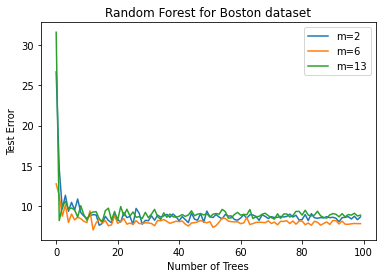

In [24]:
import matplotlib.pyplot as plt
#%matplotlib inline
for m in mTry:
    list = mse[m]
    plt.plot(list, label='m='+str(m))

plt.title('Random Forest for Boston dataset')
plt.xlabel('Number of Trees')
plt.ylabel('Test Error')
plt.legend()
plt.show()